# **Random Forest**

A Random Forest Classifier is an ensemble machine learning algorithm specifically designed for classification tasks. It operates by constructing a "forest" of multiple decision trees during training and then combines their individual predictions to determine the final class label for a new data point.

Can be performed both
* Regression
* Classification

### **classification**

In [48]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# generating data
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=42
)

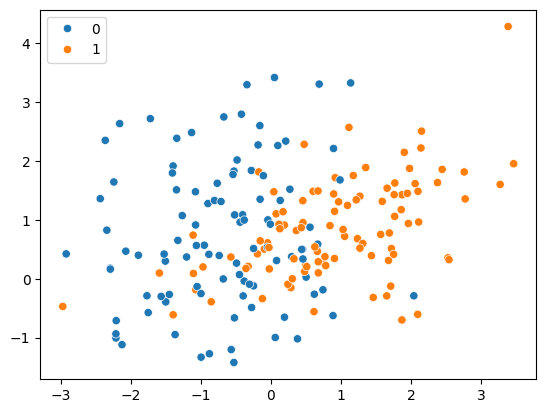

In [24]:
# ploting

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [26]:
print("train size:", x_train.shape[0])
print("test size:", x_test.shape[0])

train size: 160
test size: 40


In [31]:
# using a single decision tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# score on test data

print(f"Classification Report:\n{classification_report(y_test, tree_clf.predict(x_test))}")

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        23
           1       0.52      0.65      0.58        17

    accuracy                           0.60        40
   macro avg       0.60      0.61      0.60        40
weighted avg       0.62      0.60      0.60        40



got f1 score of 0.58 (very low)

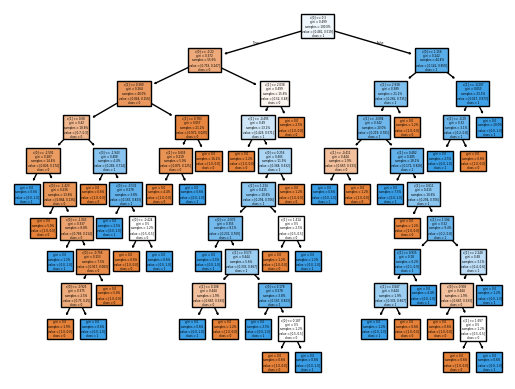

In [36]:
# visualizing the tree and boundary

plot_tree(tree_clf, class_names=['0', '1'], filled=True, proportion=True)
plt.show()

We got a large tree, which is overfitted (by observing)

In [39]:
print(f"Train f1 score: {f1_score(y_train, tree_clf.predict(x_train)):.3f}")
print(f"Test f1 score: {f1_score(y_test, tree_clf.predict(x_test)):.3f}")

Train f1 score: 1.000
Test f1 score: 0.579


Model is highly overfitted

<Axes: >

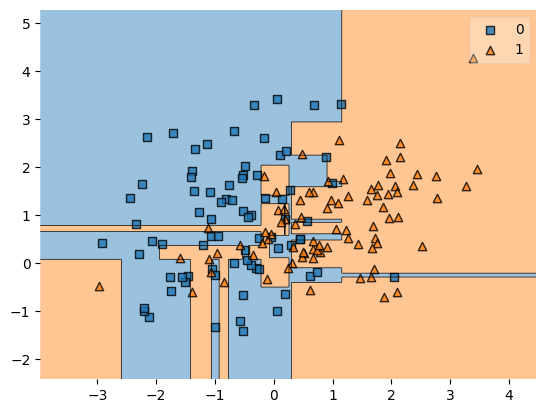

In [ ]:
# decision boundary

plot_decision_regions(x_train, y_train, clf=tree_clf)
plt.show()

We can observe the overfitting

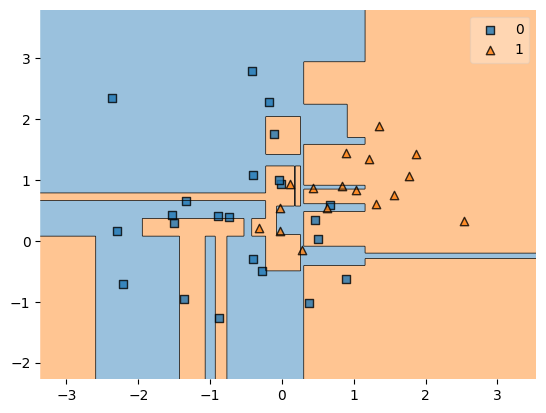

In [42]:
plot_decision_regions(x_test, y_test, clf=tree_clf)
plt.show()

#### **Random Forest**

In [44]:
# building a random forest classifier with 10 decision trees

rand_clf = RandomForestClassifier() # by default 10 classifiers
rand_clf.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
# test scores and classification report

y_train_pred = rand_clf.predict(x_train)
y_test_pred = rand_clf.predict(x_test)


print(f"Train f1 score: {f1_score(y_train, y_train_pred):.2f}")
print(f"Test f1 score: {f1_score(y_test, y_test_pred):.2f}")


Train f1 score: 1.00
Test f1 score: 0.77


f1 score increased for test data

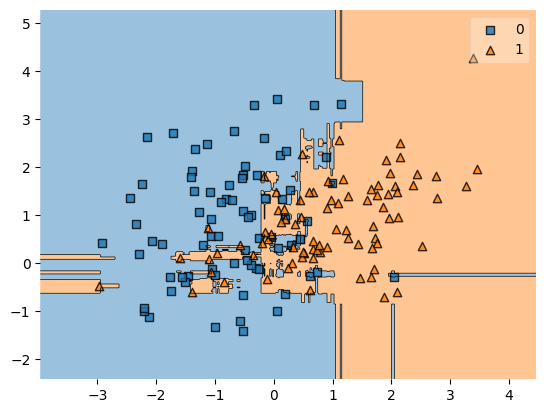

In [47]:
plot_decision_regions(x_train, y_train, clf=rand_clf)
plt.show()

We can observe the smoothening of decison boundary

In [49]:
# hyperparameter tuning for the above dataset

rand_clf = RandomForestClassifier()

param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_seach = GridSearchCV(
    estimator= rand_clf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

In [51]:
grid_seach.fit(x_train, y_train)

print(f"Best parameters:\n{grid_seach.best_params_}\n")
print(f"Best score (f1): {grid_seach.best_score_:.4f}")

Best parameters:
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}

Best score (f1): 0.7851


In [52]:
# again training and testing with the got hyperparams

clf = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=5,
    n_estimators=10
)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=10)

In [54]:
# train and test scores

print(f"Train f1 score: {f1_score(y_train, clf.predict(x_train)):.4f}")
print(f"Test f1 score: {f1_score(y_test, clf.predict(x_test)):.4f}")

Train f1 score: 0.8481
Test f1 score: 0.7429


Got a good fit model

<Axes: >

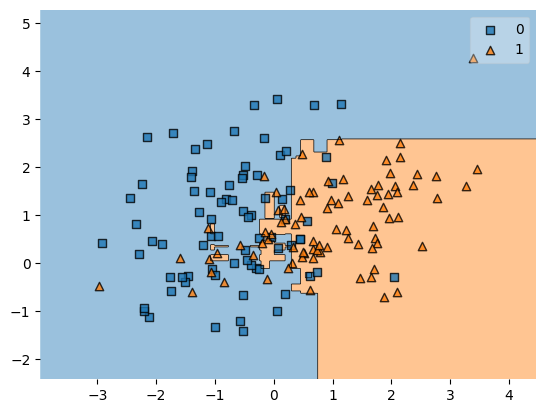

In [55]:
# decision boundaries

plot_decision_regions(x_train, y_train, clf=clf)

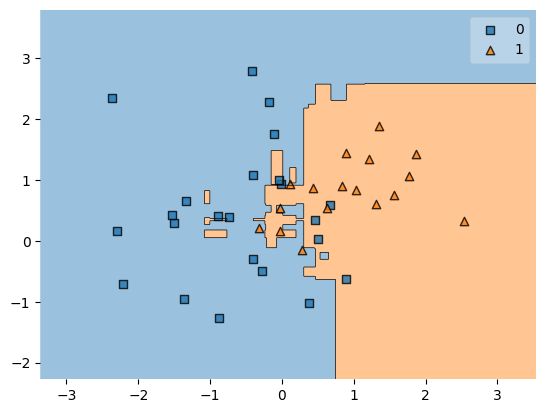

In [56]:
# test data

plot_decision_regions(x_test, y_test, clf=clf)
plt.show()